# analysis_d22a

### Purpose
Using Monte Carlo Drift Correction (MCDC), analyse data produced by [data_d22a.ipynb](https://github.com/grandey/d22a-mcdc/blob/main/data_d22a.ipynb), including production of figures and tables.

### Input data
NetCDF files in [data/](https://github.com/grandey/d22a-mcdc/tree/main/data/) (produced by [data_d22a.ipynb](https://github.com/grandey/d22a-mcdc/blob/main/data_d22a.ipynb)), each containing a global mean time series for a given variable, ESM variant, and CMIP6 scenario.

### Output files written
Figures (in [figs_d22a/](https://github.com/grandey/d22a-mcdc/tree/main/figs_d22a)) and tables (in [tables_d22a/](https://github.com/grandey/d22a-mcdc/tree/main/tables_d22a)).

### Author
BSG, 2023.

In [1]:
import d22a
import datetime

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Watermark, including versions of dependencies
print(d22a.get_watermark())

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.14.0

matplotlib : 3.7.2
numpy      : 1.25.1
pandas     : 2.0.3
scipy      : 1.11.1
statsmodels: 0.14.0
xarray     : 2023.6.0

conda environment: d22a-mcdc

Compiler    : Clang 15.0.7 
OS          : Darwin
Release     : 22.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [4]:
# Print constants relating to reference period, default ESM, and number of samples
for const in [d22a.REF_YRS, d22a.REF_STR, d22a.DEF_ESM, d22a.SAMPLE_N]:
    print(const)

[1850, 1859]
1850s
UKESM1-0-LL_r1i1p1f2
1500


In [5]:
# Read all model data into cache at start
_ = d22a.get_cmip6_df()

get_cmip6_df(ACCESS-CM2_r1i1p1f1, piControl): shifted start year from 950 to 1850
get_cmip6_df(ACCESS-ESM1-5_r1i1p1f1, piControl): shifted start year from 101 to 1790
get_cmip6_df(CanESM5_r1i1p1f1, piControl): shifted start year from 5201 to 1850
get_cmip6_df(EC-Earth3-Veg-LR_r1i1p1f1, piControl): shifted start year from 2300 to 1850
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): shifted start year from 1850 to 1790
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): gap after 2789; using period before gap; length 1800 yr -> 1000 yr
get_cmip6_df(MIROC6_r1i1p1f1, piControl): shifted start year from 3200 to 1850
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, piControl): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, historical): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1 ssp126): shifted yr-2015 zostoga from 2.0 to 69.4 mm
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, ssp126): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f

## Main manuscript

In [6]:
# Summary table (across ensemble)
tex_str = d22a.get_summary_tex(target_decade='2000s')  # Latex version
_ = d22a.name_save_table(tex_str, fso='f')  # save Latex version
summary_df = d22a.get_summary_df(target_decade='2000s')  # show DataFrame version
summary_df

sample_drift(UKESM1-0-LL_r1i1p1f2, Ep, 0): standard error of mean is 0.006085866722910316
sample_drift(UKESM1-0-LL_r1i1p1f2, Hp, 0): standard error of mean is 0.005901459726878913
sample_drift(UKESM1-0-LL_r1i1p1f2, E, 1): standard error of trend is 3.163055350016399e-05
sample_drift(UKESM1-0-LL_r1i1p1f2, H, 1): standard error of trend is 3.1606286382530085e-05
sample_drift(UKESM1-0-LL_r1i1p1f2, E, 1): standard error of trend is 3.163055350016399e-05
sample_drift(UKESM1-0-LL_r1i1p1f2, H, 1): standard error of trend is 3.1606286382530085e-05
sample_drift(UKESM1-0-LL_r1i1p1f2, Z, 1): standard error of trend is 0.00368951664841096
sample_drift(UKESM1-0-LL_r1i1p1f2, Z, 1): standard error of trend is 0.00368951664841096
Written table_01.tex


$\Delta E$ (2000s; YJ) $\Delta H$ (2000s; YJ)  \
Drift uncertainty Int.-bias       0.07 (0.03–0.15)       0.07 (0.03–0.16)   
                  Linear          0.02 (0.00–0.06)       0.02 (0.00–0.06)   
                  Agnostic        0.09 (0.03–0.17)       0.08 (0.03–0.20)   
Other uncertainty Model                       0.56                   0.61   
                  Scenario                     NaN                    NaN   

                            $\Delta Z$ (2000s; mm) $\eta$ (unitless)  \
Drift uncertainty Int.-bias                    NaN  0.03 (0.01–0.07)   
                  Linear                   2 (0–8)  0.01 (0.00–0.03)   
                  Agnostic               10 (3–24)  0.06 (0.01–0.14)   
Other uncertainty Model                         64  0.17 (0.16–0.18)   
                  Scenario                     NaN  0.01 (0.01–0.08)   

                            $\epsilon$ (mm YJ$^{-1}$)  
Drift uncertainty Int.-bias                       NaN  
                  Linear                      1 (0–3)  
                  Agnostic                   7 (1–22)  
Other uncertainty Model                    12 (11–13)  
                  Scenario                   7 (4–10)

Written fig01.pdf (0.06 MB)
Written fig01.png (1.11 MB)


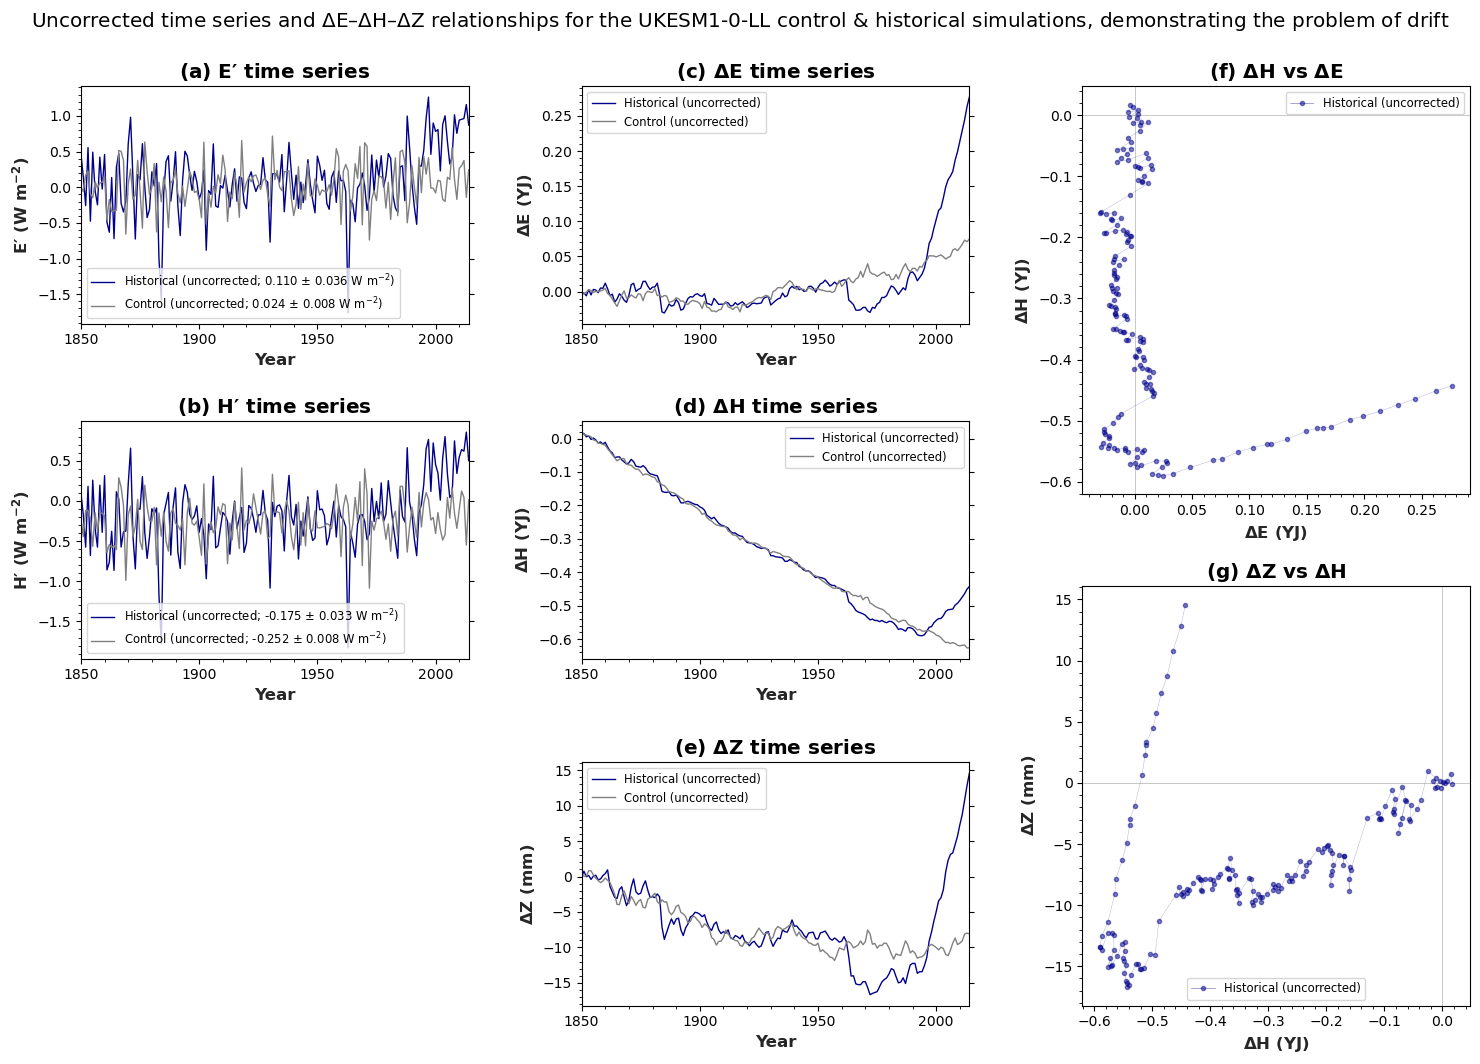

In [ ]:
# Demonstrate problem of drift
fig = d22a.composite_problem_of_drift()
_ = d22a.name_save_fig(fig, fso='f')

Written fig02.pdf (36.81 MB)
Written fig02.png (2.53 MB)


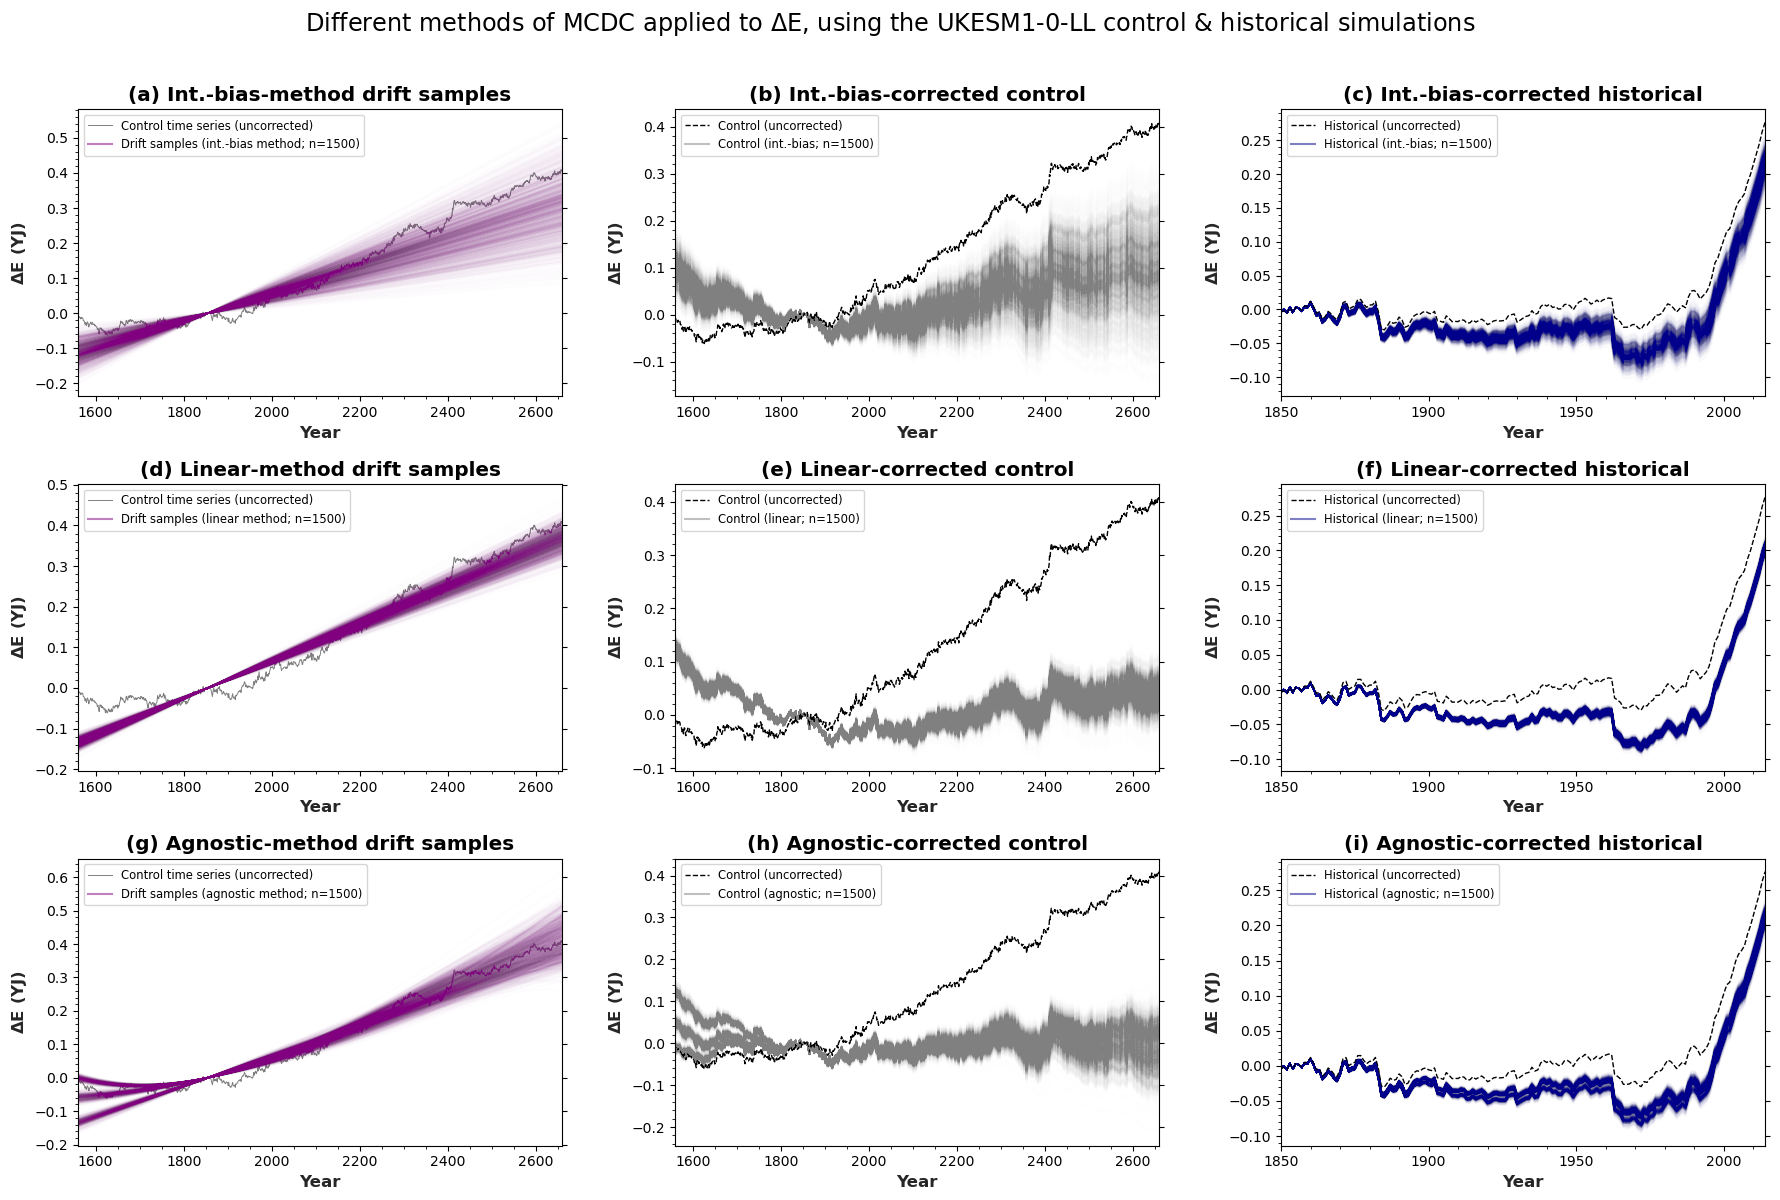

In [ ]:
# Compare methods applied to E
fig = d22a.composite_compare_methods_timeseries(variable='E')
_ = d22a.name_save_fig(fig, fso='f')

Written fig03.pdf (0.08 MB)
Written fig03.png (0.86 MB)


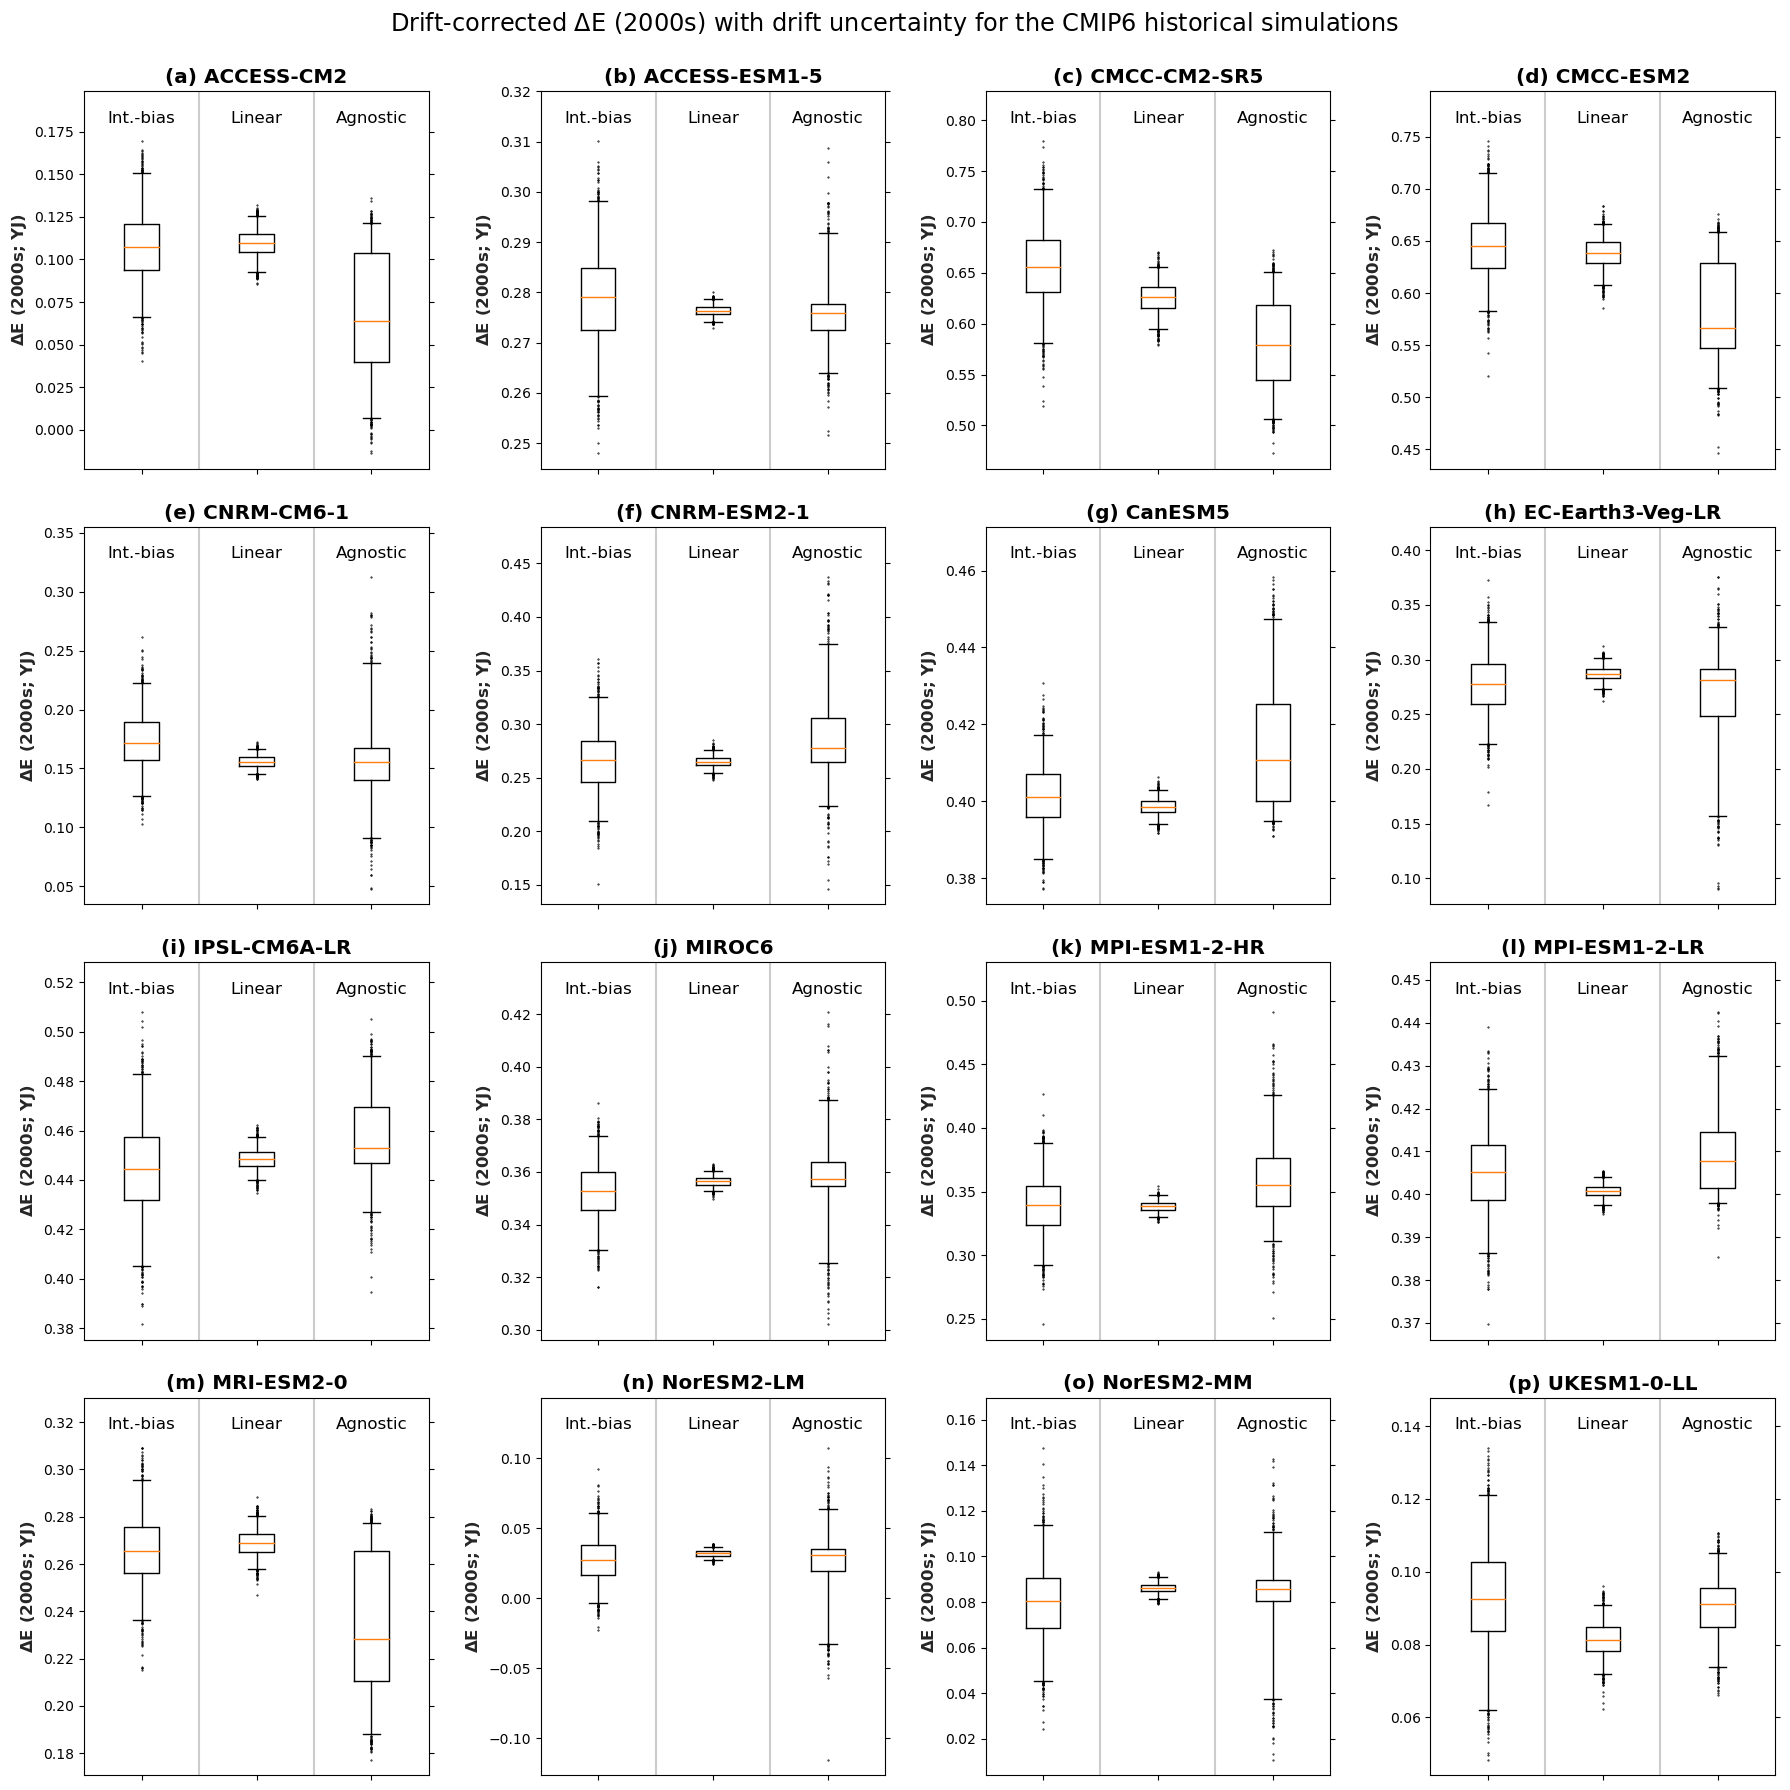

In [9]:
# Ensemble boxplots for E for the 2000s
for variable in ['E',]:
    # Ensemble boxplots
    fig = d22a.ensemble_boxplots(variable=variable, target_decade='2000s')
    _ = d22a.name_save_fig(fig, fso='f')

Written fig04.pdf (14.94 MB)


/Users/benjamin/github/d22a-mcdc/d22a.py:1242: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(fig_path)


Written fig04.png (1.22 MB)


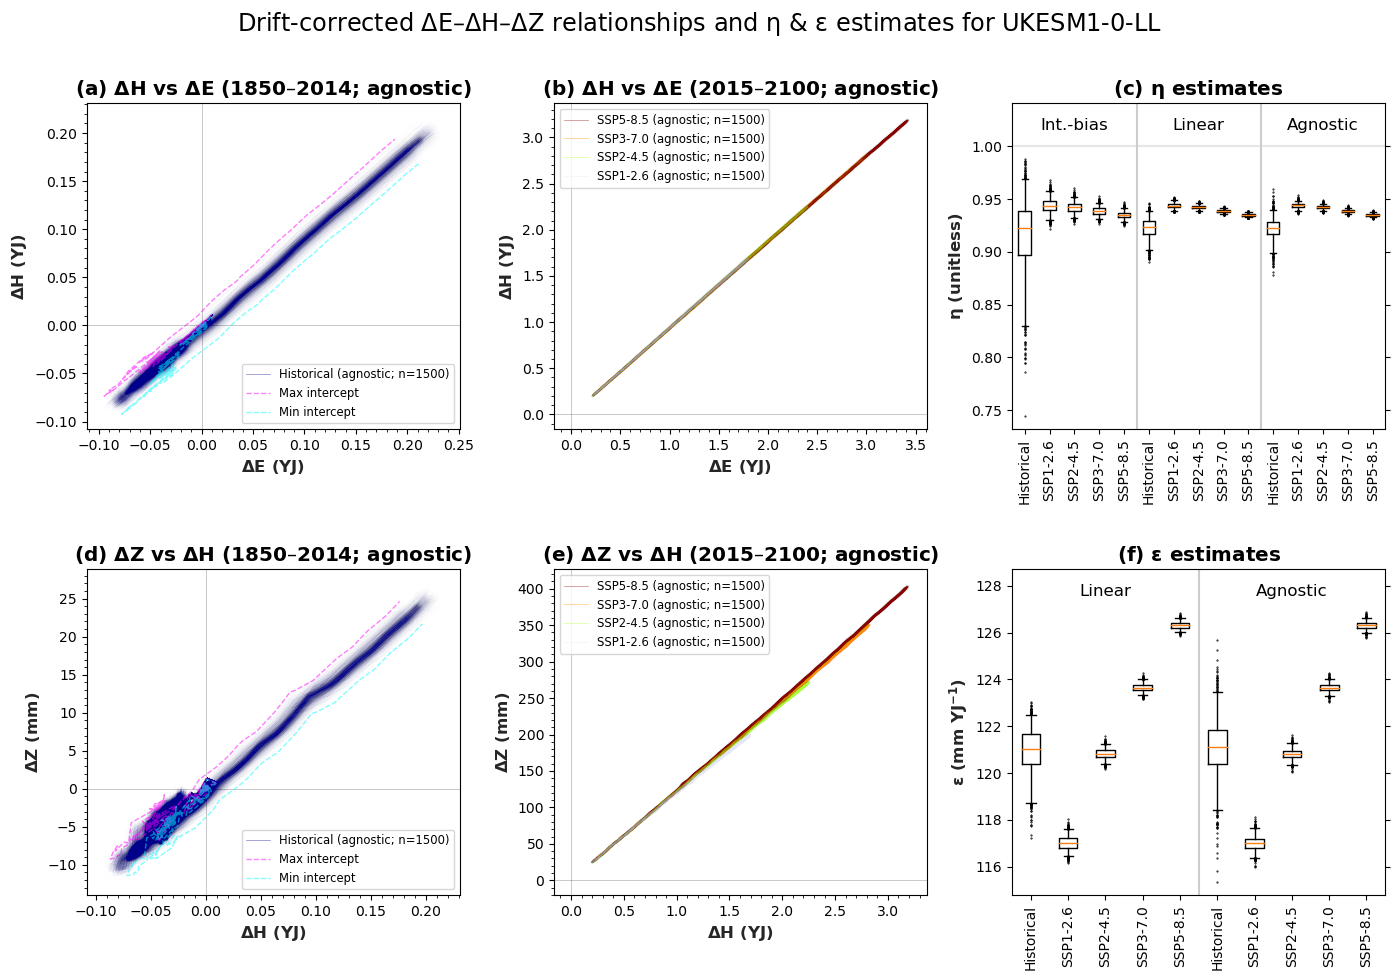

In [10]:
# Relationships, eta, eps
fig = d22a.composite_rel_eta_eps_demo()
_ = d22a.name_save_fig(fig, fso='f')

Written fig05.pdf (0.26 MB)
Written fig05.png (1.02 MB)


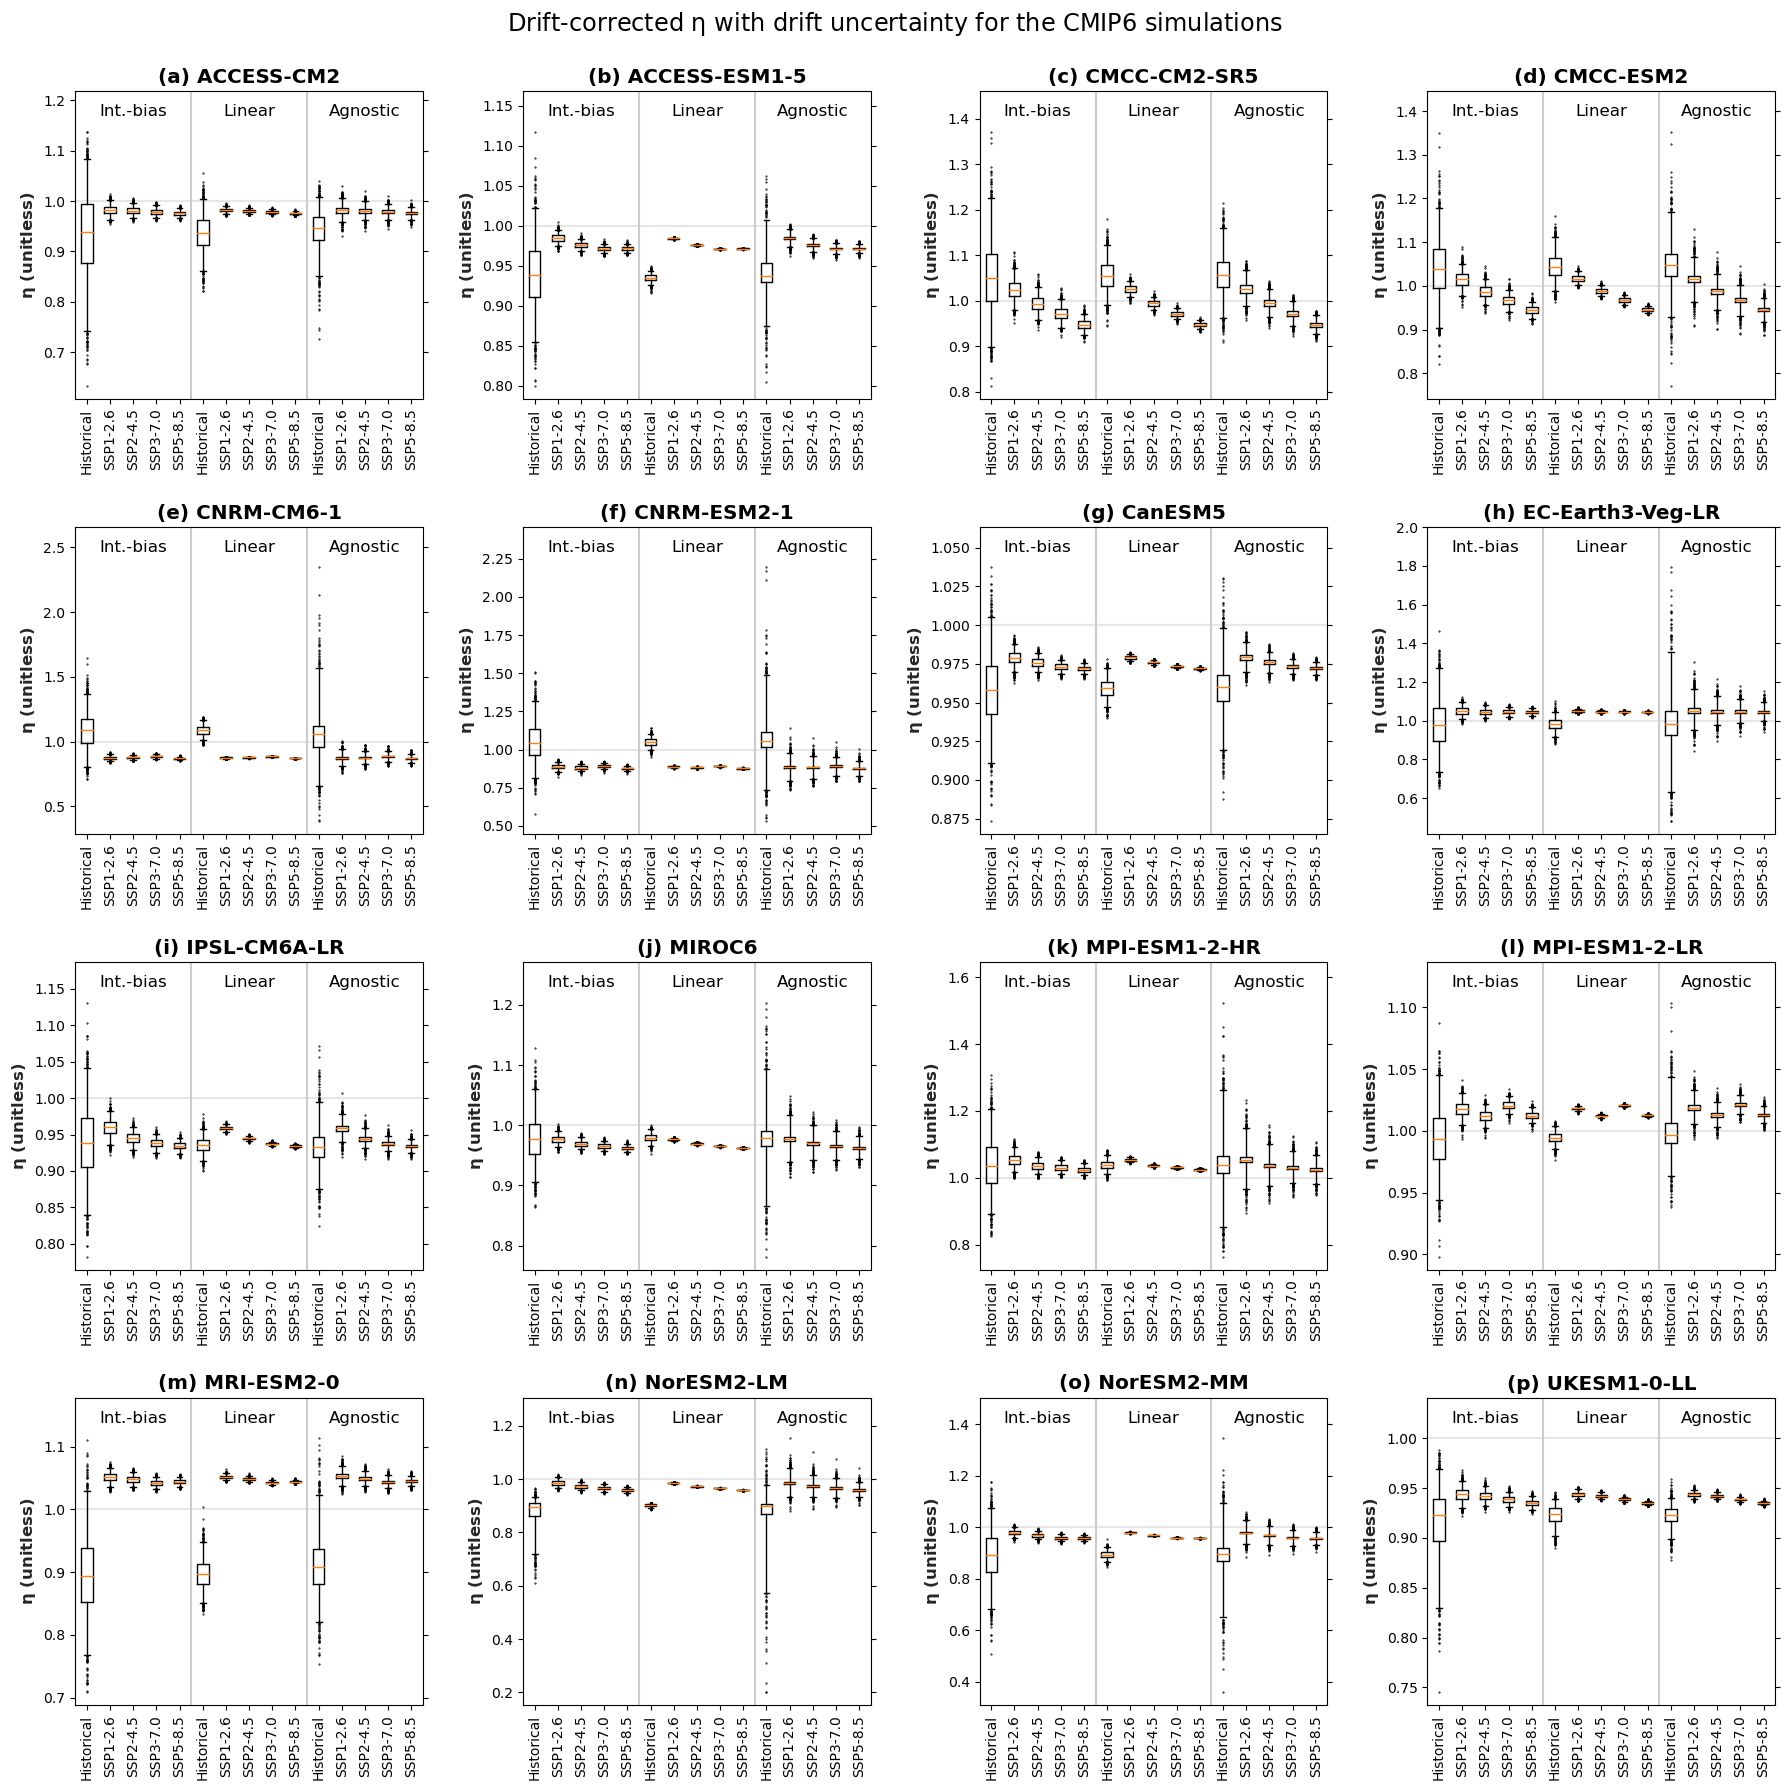

In [11]:
# Ensemble boxplots for eta
fig = d22a.ensemble_boxplots(variable='eta', target_decade=None)
_ = d22a.name_save_fig(fig, fso='f')

## Supplement

In [12]:
# Table containing model information
tex_str = d22a.get_esm_info_tex()
_ = d22a.name_save_table(tex_str, fso='s')  # save
# Show corresponding DataFrame in notebook
info_df = d22a.get_esm_info_df()
info_df

Written table_S01.tex


,Variant,Control length (yr),Calendar,Further information URL
Model,,,,
ACCESS-CM2,r1i1p1f1,500,proleptic gregorian,https://furtherinfo.es-doc.org/CMIP6.CSIRO-ARC...
ACCESS-ESM1-5,r1i1p1f1,1000,proleptic gregorian,https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACC...
CMCC-CM2-SR5,r1i1p1f1,500,365 day,https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC...
CMCC-ESM2,r1i1p1f1,500,365 day,https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC...
CNRM-CM6-1,r1i1p1f2,500,gregorian,https://furtherinfo.es-doc.org/CMIP6.CNRM-CERF...
CNRM-ESM2-1,r1i1p1f2,500,gregorian,https://furtherinfo.es-doc.org/CMIP6.CNRM-CERF...
CanESM5,r1i1p1f1,1000,365 day,https://furtherinfo.es-doc.org/CMIP6.CCCma.Can...
EC-Earth3-Veg-LR,r1i1p1f1,501,proleptic gregorian,https://furtherinfo.es-doc.org/CMIP6.EC-Earth-...
IPSL-CM6A-LR,r1i1p1f1,1000,gregorian,https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL...


In [13]:
# # Compare methods applied to H & Z
# for variable in ['H', 'Z']:
#     fig = d22a.composite_compare_methods_timeseries(variable=variable)
#     _ = d22a.name_save_fig(fig, fso='s')

Written s01.pdf (0.08 MB)
Written s01.png (0.87 MB)
Written s02.pdf (0.07 MB)
Written s02.png (0.68 MB)
Written s03.pdf (0.19 MB)
Written s03.png (0.93 MB)


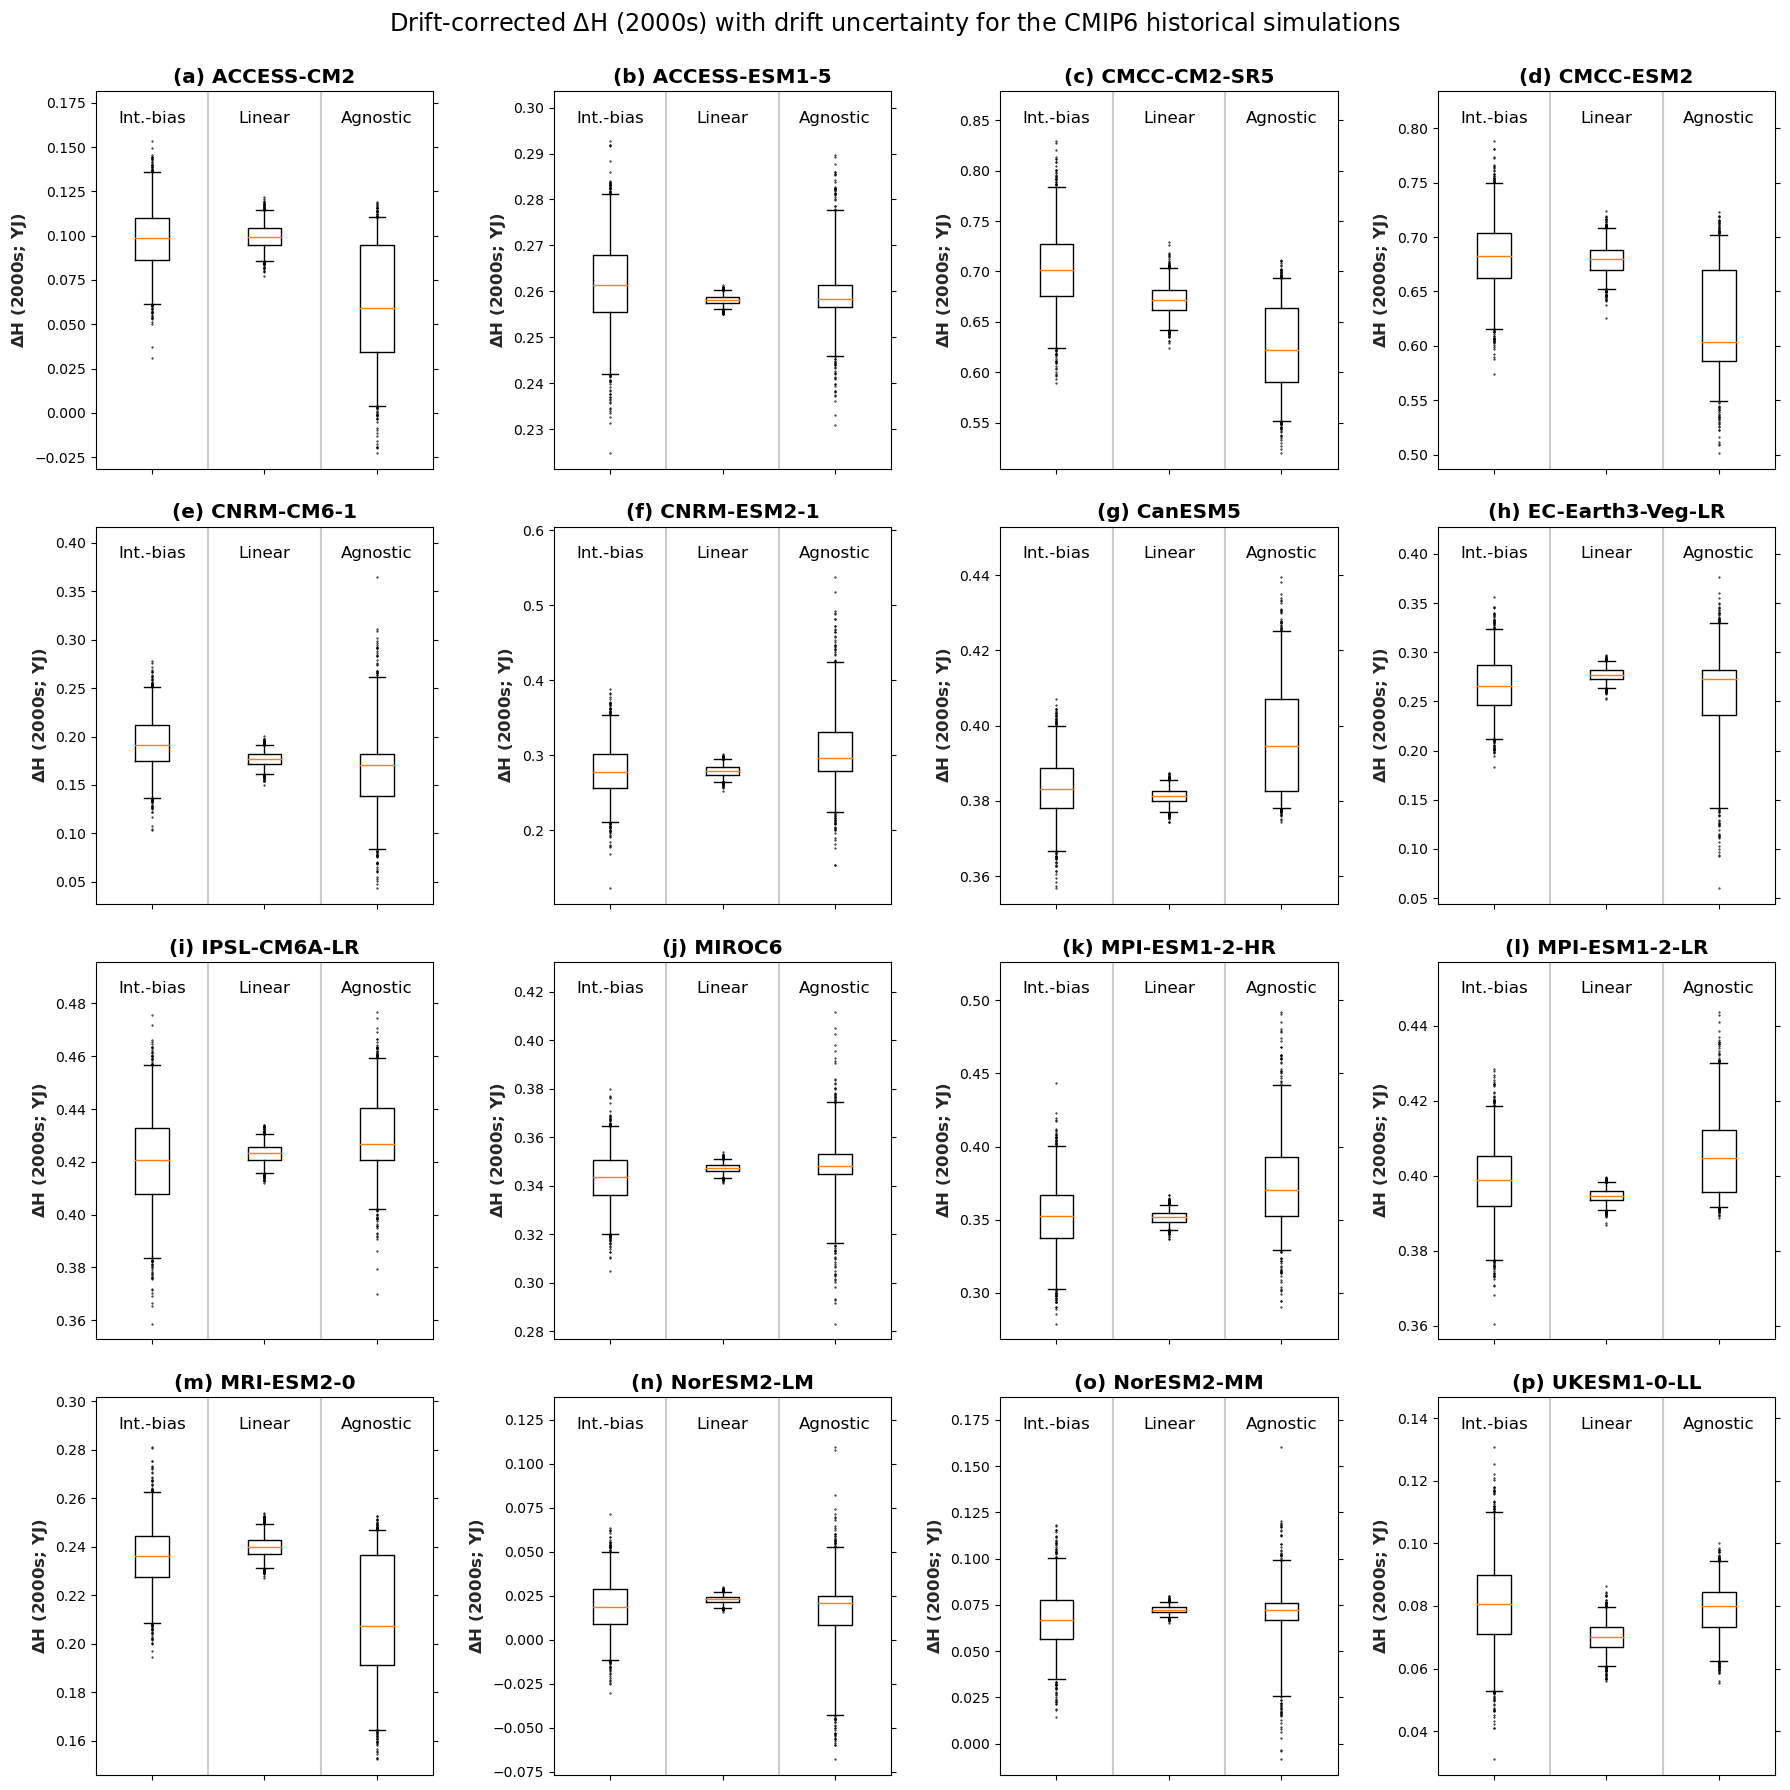

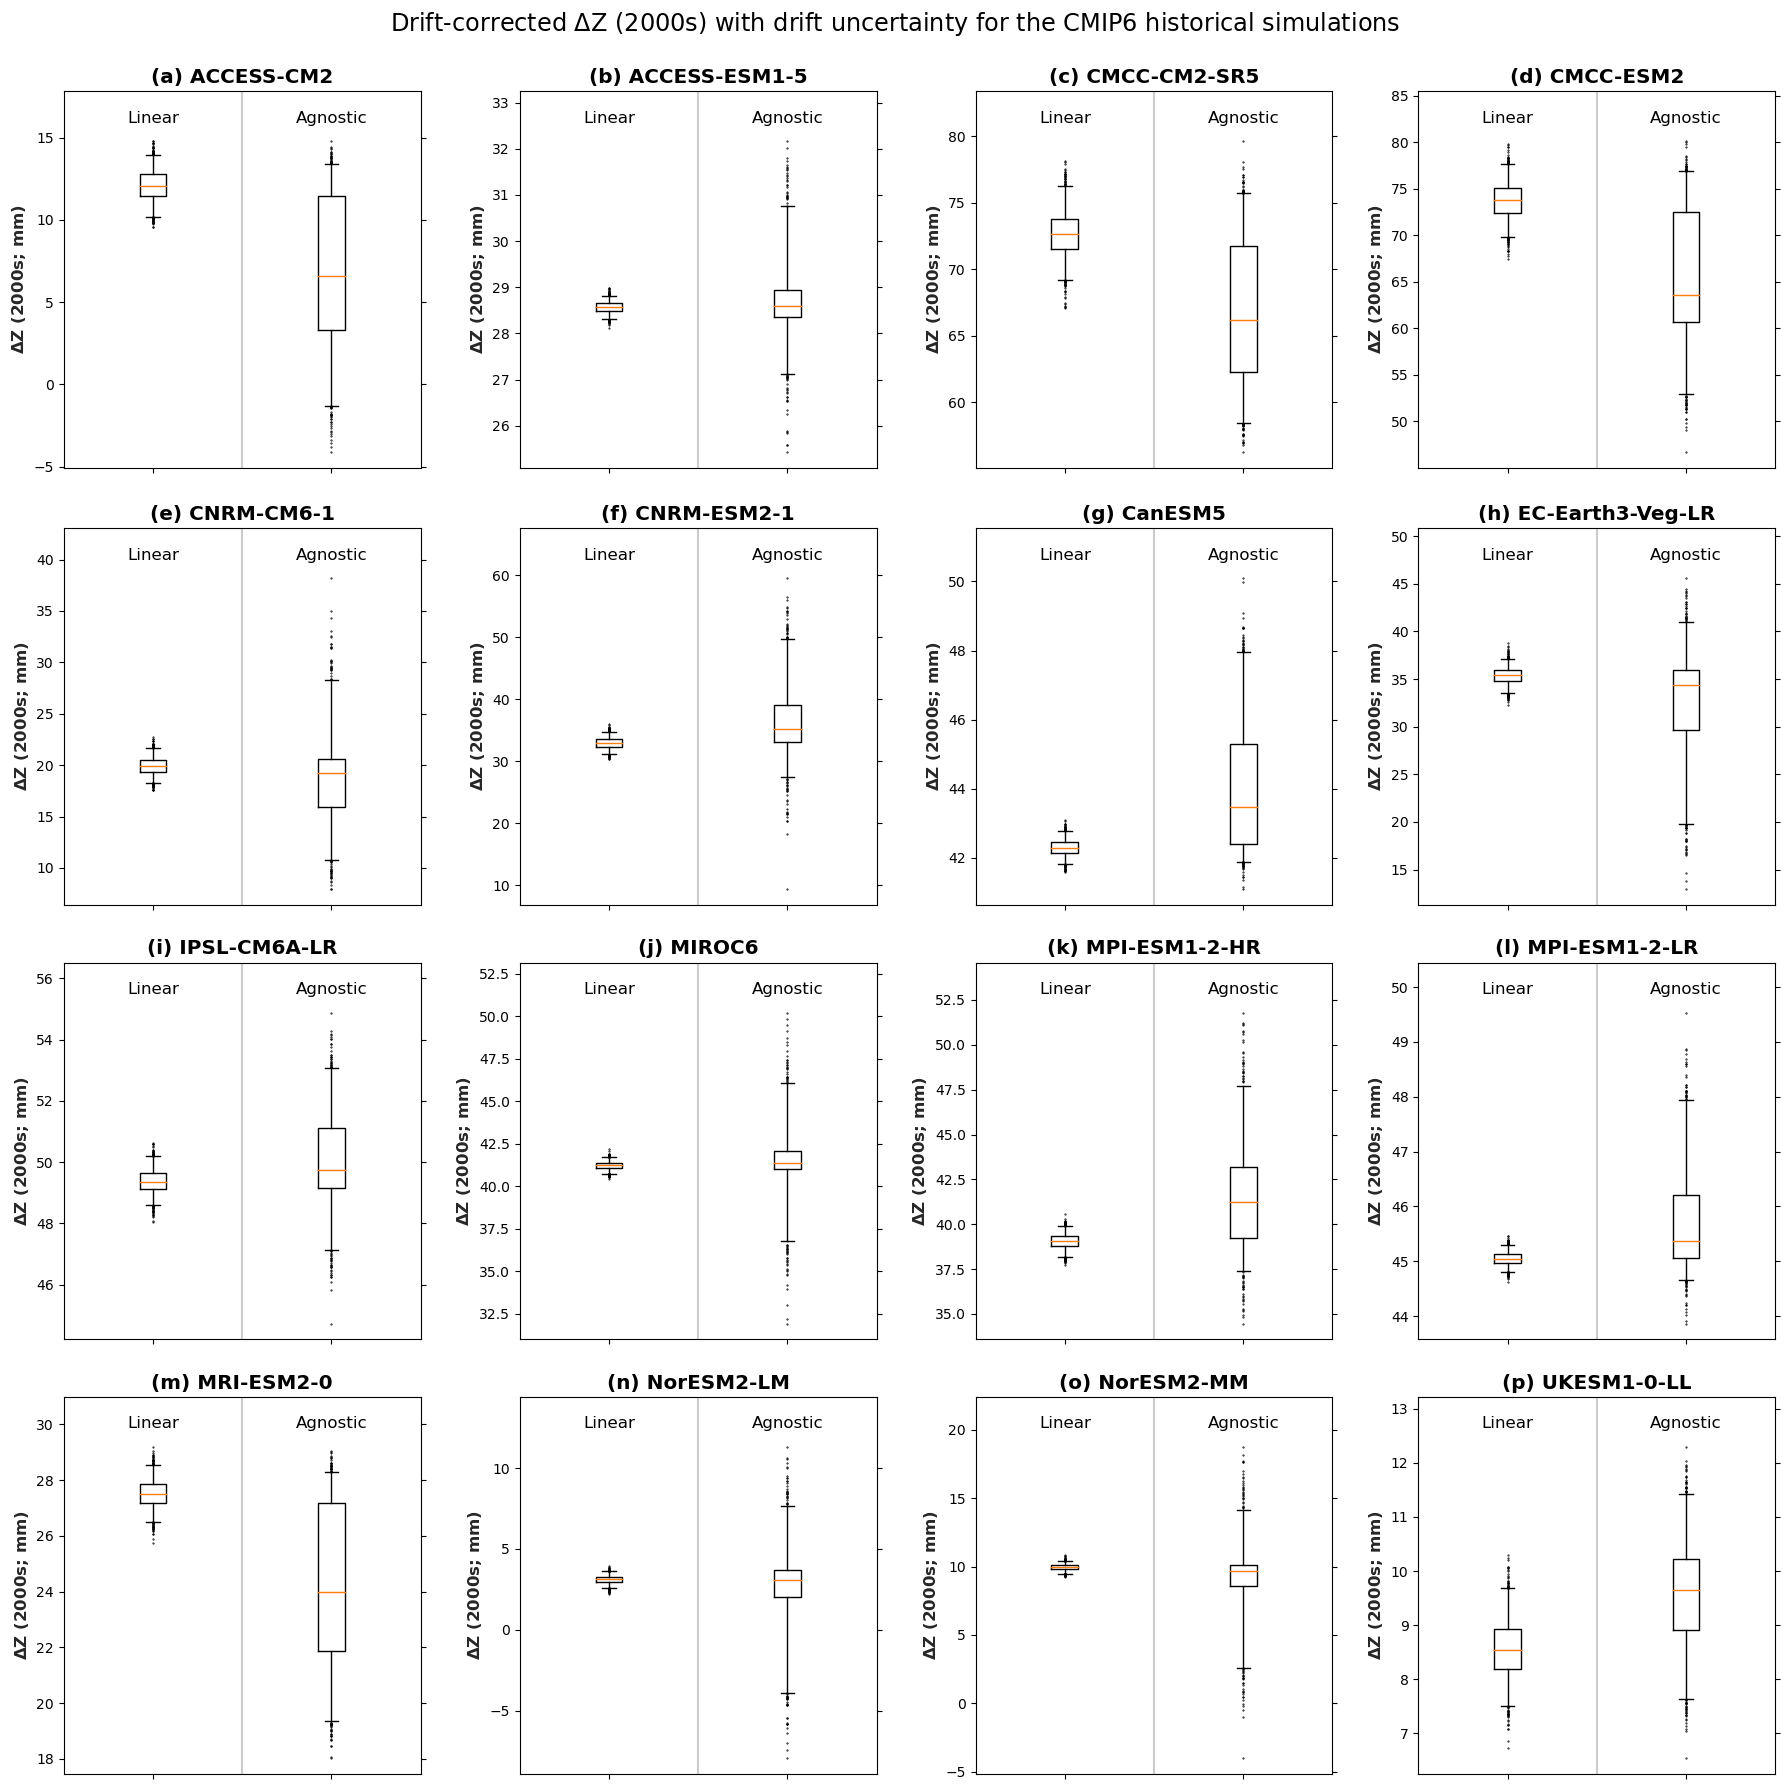

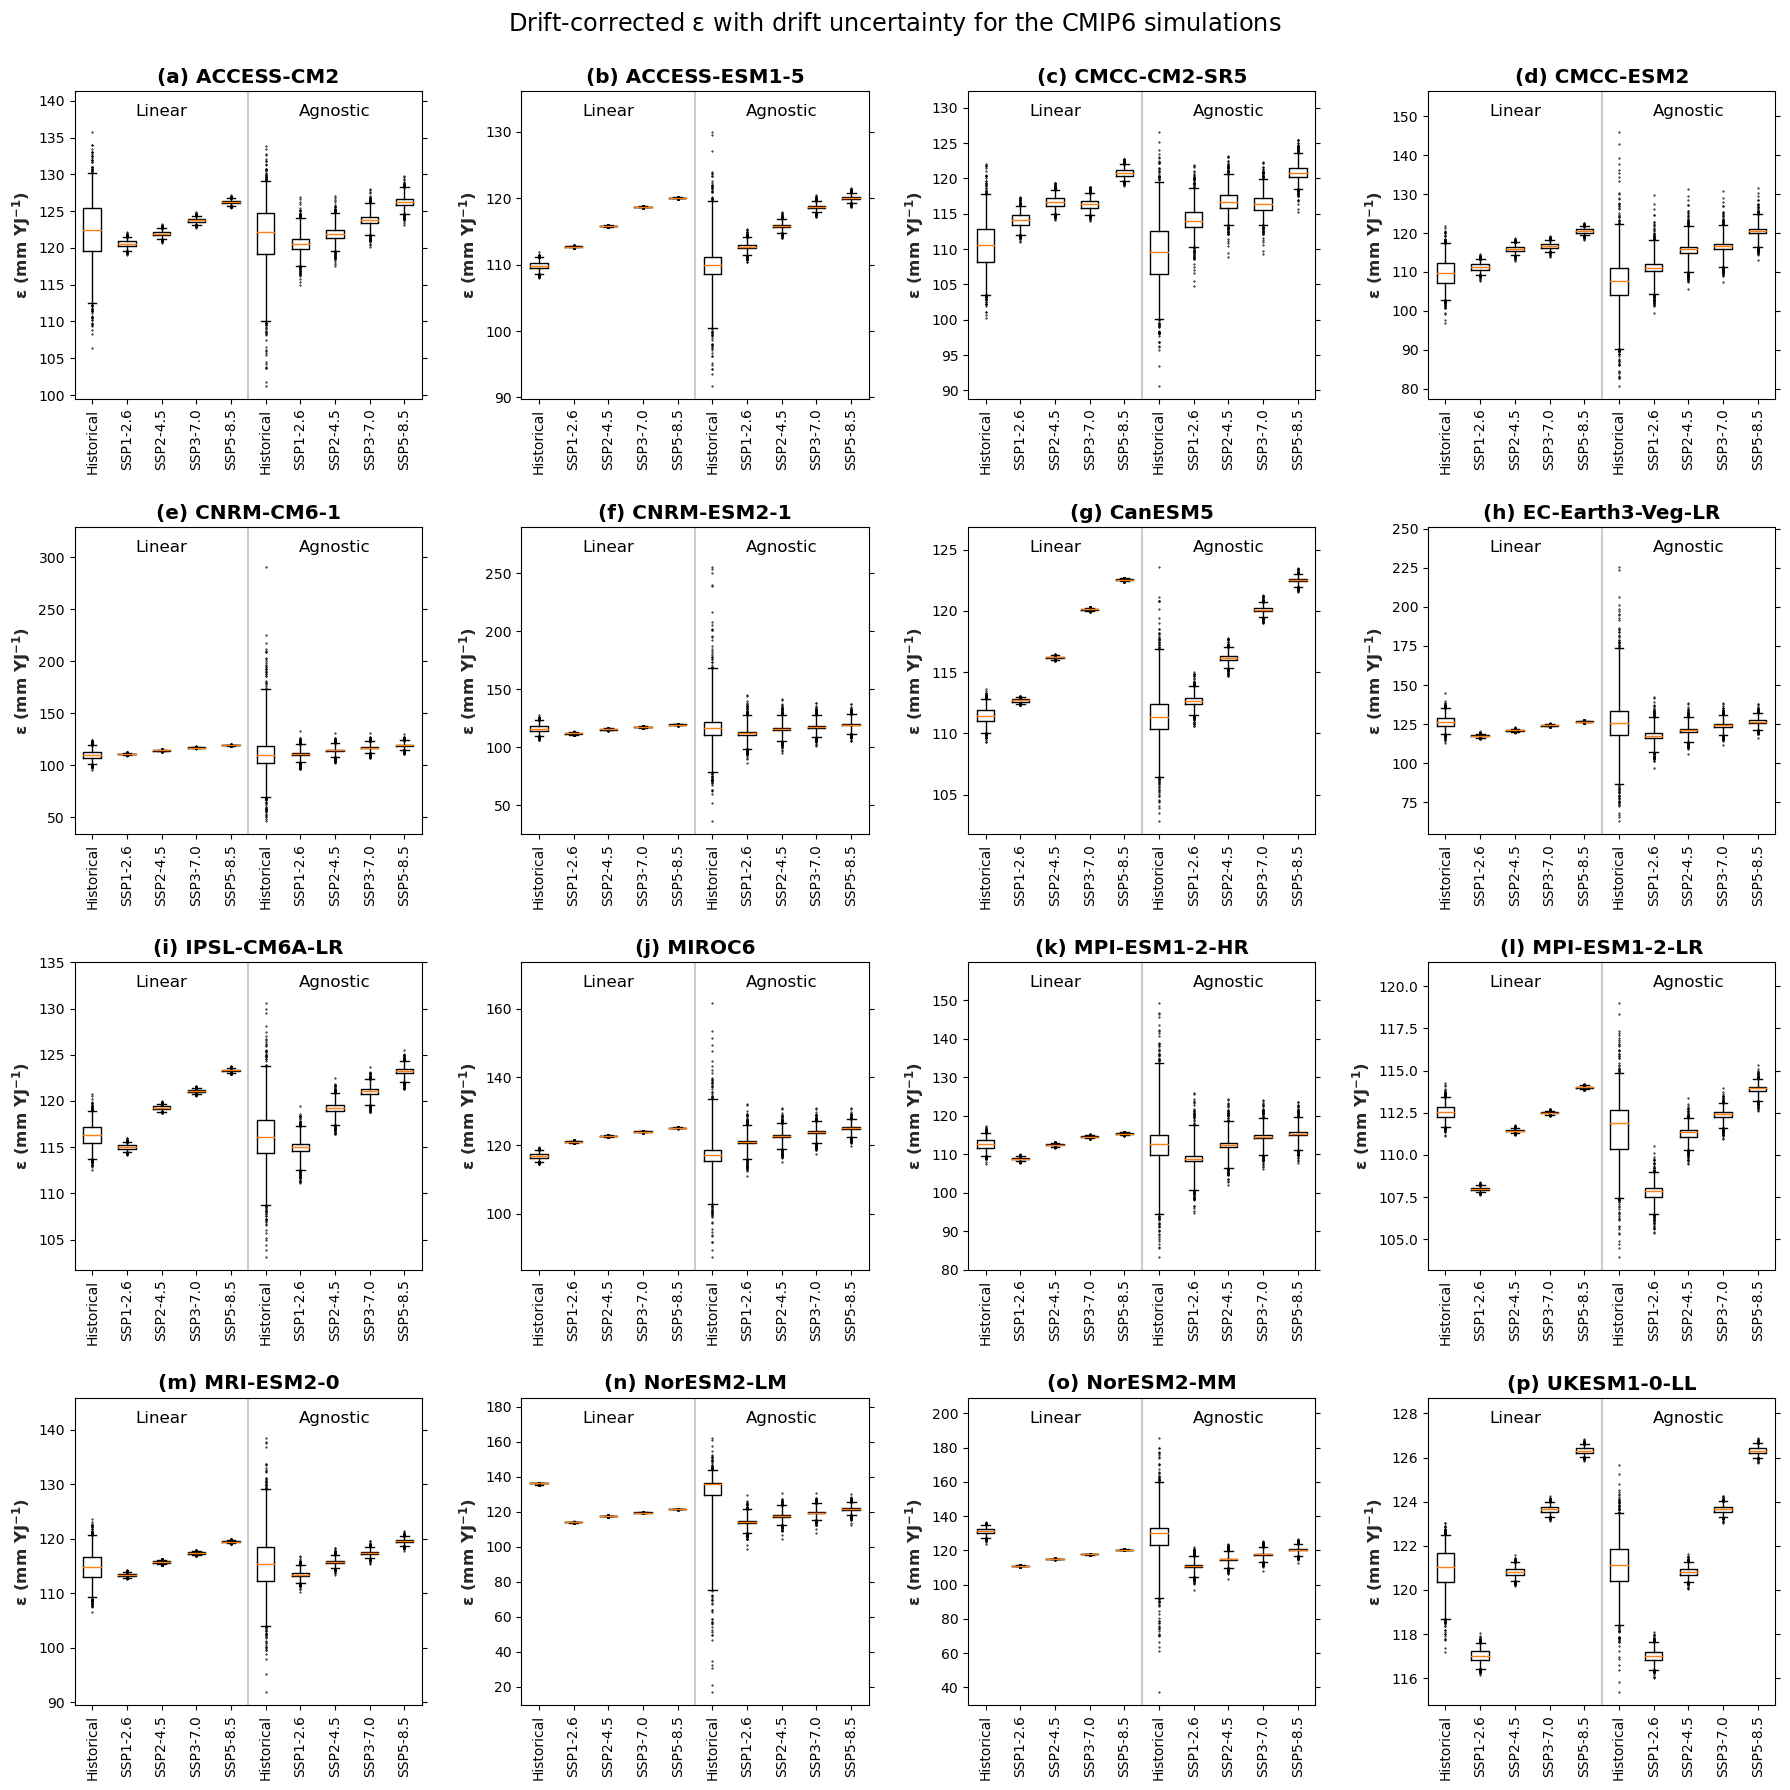

In [14]:
# Ensemble boxplots for H (2000s), Z (2000s), and eps
for variable, target_decade in [('H', '2000s'), ('Z', '2000s'), ('eps', None)]:
    # Ensemble boxplots
    fig = d22a.ensemble_boxplots(variable=variable, target_decade=target_decade)
    _ = d22a.name_save_fig(fig, fso='s')

In [15]:
# Detailed tables for E, H, and Z for 2000s
for variable in ['E', 'H', 'Z']:
    # Latex table
    tex_str = d22a.get_detailed_tex(variable=variable, target_decade='2000s')
    _ = d22a.name_save_table(tex_str, fso='s')
    # Table as DataFrame
    detailed_df = d22a.get_detailed_df(variable=variable, target_decade='2000s')
    print(f'{variable} (2000s)', detailed_df)

Written table_S02.tex
E (2000s)                  Drift uncertainty                 Other uncertainty
                         Int.-bias Linear Agnostic             Model
ACCESS-CM2                    0.08   0.03     0.11               NaN
ACCESS-ESM1-5                 0.04   0.00     0.03               NaN
CMCC-CM2-SR5                  0.15   0.06     0.14               NaN
CMCC-ESM2                     0.13   0.06     0.15               NaN
CNRM-CM6-1                    0.10   0.02     0.15               NaN
CNRM-ESM2-1                   0.12   0.02     0.15               NaN
CanESM5                       0.03   0.01     0.05               NaN
EC-Earth3-Veg-LR              0.11   0.03     0.17               NaN
IPSL-CM6A-LR                  0.08   0.02     0.06               NaN
MIROC6                        0.04   0.01     0.06               NaN
MPI-ESM1-2-HR                 0.10   0.02     0.11               NaN
MPI-ESM1-2-LR                 0.04   0.01     0.03               NaN
MR

In [16]:
# Detailed tables for eta and eps
for variable in ['eta', 'eps']:
    # Latex table
    tex_str = d22a.get_detailed_tex(variable=variable, target_decade=None)
    _ = d22a.name_save_table(tex_str, fso='s')
    # Table as DataFrame
    detailed_df = d22a.get_detailed_df(variable=variable, target_decade=None)
    print(f'{variable}', detailed_df)

Written table_S05.tex
eta                  Drift uncertainty                 Other uncertainty         
                         Int.-bias Linear Agnostic             Model Scenario
ACCESS-CM2                    0.03   0.01     0.04               NaN     0.01
ACCESS-ESM1-5                 0.01   0.00     0.02               NaN     0.01
CMCC-CM2-SR5                  0.07   0.03     0.06               NaN     0.08
CMCC-ESM2                     0.06   0.02     0.08               NaN     0.07
CNRM-CM6-1                    0.04   0.01     0.10               NaN     0.01
CNRM-ESM2-1                   0.05   0.01     0.14               NaN     0.01
CanESM5                       0.01   0.00     0.01               NaN     0.01
EC-Earth3-Veg-LR              0.06   0.01     0.14               NaN     0.01
IPSL-CM6A-LR                  0.03   0.01     0.03               NaN     0.02
MIROC6                        0.02   0.00     0.06               NaN     0.01
MPI-ESM1-2-HR                 0.05   0

In [17]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2023-07-25 16:00:33
End:       2023-07-25 16:04:35
Wall time: 242 s
